In [1]:
from gqn.tgqn import TGQN
from gqn.generator import GeneratorNetwork
import torch

In [28]:
model = TGQN(x_dim=3, v_dim=7, r_dim=256, h_dim=128, z_dim=64, L=12)

In [3]:
model.add_listener(model.generator, "move robotic arm")
model.add_listener(model.generator, "get funky")

In [4]:
model.pretty()

CORE GQN:  TGQN(
  (generator): GeneratorNetwork(
    (inference_core): Conv2dLSTMCell(
      (forget): Conv2d(394, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (input): Conv2d(394, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (output): Conv2d(394, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (state): Conv2d(394, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (generator_core): Conv2dLSTMCell(
      (forget): Conv2d(327, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (input): Conv2d(327, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (output): Conv2d(327, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (state): Conv2d(327, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (posterior_density): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (prior_density): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (observa

In [18]:
# Load dataset
from shepardmetzler import ShepardMetzler, transform_viewpoint
from torch.utils.data import DataLoader

!pwd
dataset = ShepardMetzler("./shepard_metzler_5_parts/", target_transform=transform_viewpoint)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

/Users/eli/Documents/generative-query-network-pytorch


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([15, 3, 64, 64])

















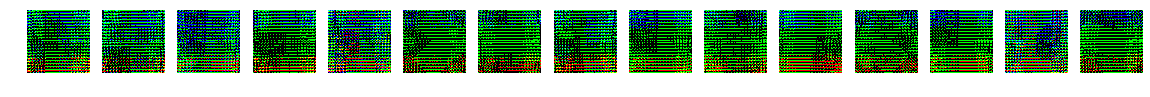

In [25]:
# render data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f, axarr = plt.subplots(1, 15, figsize=(20, 7))

x, v = next(iter(loader))
print(x[0][0].shape)

for i, ax in enumerate(axarr.flat):
    print()
    img = x[0][0][i].permute(1,2,0)
    ax.imshow(img) # added an extra 0
    ax.axis("off")

RUNNING MODEL:  move robotic arm
RUNNING MODEL:  get funky
move robotic arm
tensor(0.4941, grad_fn=<SelectBackward>)
get funky
tensor(0.4885, grad_fn=<SelectBackward>)
0.50136685


(-0.5, 63.5, 63.5, -0.5)

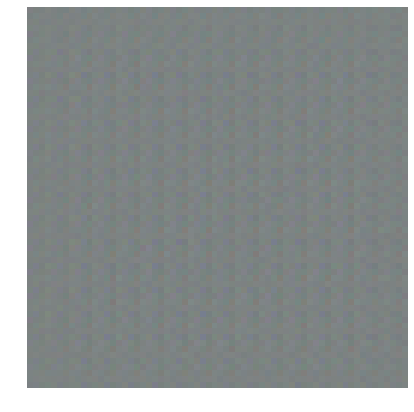

In [20]:
## TEST OUT MODEL WITH SOME FAKE DATA
x = torch.rand(1, 5, 3, 64, 64) # batch of context images
v = torch.rand(1, 5, 7)
q_x = torch.rand(1, 3, 64, 64)
q_v = torch.rand(1, 7)
x_mu, r, kl, outputs = model(x, v, q_x, q_v) # run random through model

# display results of model visually
f, axarr = plt.subplots(1, 1, figsize=(20, 7))


for output in outputs:
    print(output[1])
    print(output[0][0][0][0][0][0])
    
img = x_mu[0].permute(1,2,0).detach().numpy()
print(img[0][0][0])

axarr.imshow(img) # added an extra 0
axarr.axis("off")

torch.Size([1, 1, 15, 3, 64, 64])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [256, 3, 2, 2], but got 5-dimensional input of size [1, 15, 3, 64, 64] instead

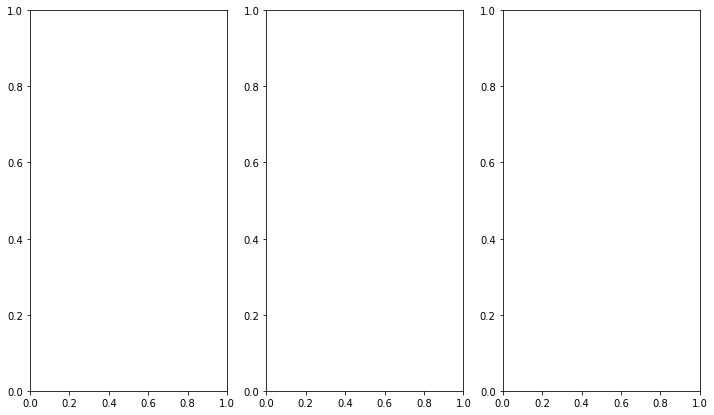

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 7))

q_x = torch.rand(1, 3, 64, 64)
q_v = torch.rand(1, 7)
print(x.shape)
x_mu, x_q, r, _ = model(x, v, q_x, q_v)

ax1.imshow(x_q[0].data.permute(1, 2, 0))
ax1.set_title("Query image")

ax2.imshow(x_mu[0].data.permute(1, 2, 0))
ax2.set_title("Reconstruction")

ax3.imshow(r.data.view(16, 16))
ax3.set_title("Representation")

plt.show()